[Stock Market Clustering With Python](https://www.youtube.com/watch?v=PSIqZeLrQxo) by NeuralNine

In [1]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy.cluster import hierarchy
import scipy.spatial.distance as ssd

In [2]:
# Import data
stock_symbols = [f"stock{i}" for i in range(50)]
df = pd.read_csv('prices.txt', engine='python', sep='   ', header=None, names=stock_symbols)
df

,stock0,stock1,stock2,stock3,stock4,stock5,stock6,stock7,stock8,stock9,...,stock40,stock41,stock42,stock43,stock44,stock45,stock46,stock47,stock48,stock49
0,13.46,71.65,48.46,50.52,52.10,13.00,18.98,47.71,69.49,49.96,...,32.64,55.76,14.46,58.94,36.71,52.62,49.33,36.22,49.00,56.09
1,13.48,72.10,48.52,50.50,52.06,12.95,18.95,47.84,69.73,49.93,...,32.52,55.97,14.44,59.81,36.64,52.58,49.20,36.27,48.84,56.08
2,13.47,72.35,48.48,50.62,51.80,12.79,18.98,47.98,69.60,49.33,...,32.48,56.34,14.50,59.04,36.89,52.49,49.48,36.39,48.56,55.90
3,13.53,72.51,48.42,50.75,51.66,12.66,18.96,48.74,69.54,49.67,...,32.59,56.32,14.40,58.73,36.94,52.40,49.42,36.41,49.00,56.14
4,13.64,71.99,48.40,50.65,51.97,12.62,18.89,48.88,69.68,49.46,...,32.64,56.32,14.36,59.01,37.03,52.44,49.79,36.42,48.14,55.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,13.69,67.73,46.64,45.72,52.42,10.07,18.05,48.42,69.00,56.19,...,30.73,75.82,10.63,61.35,32.85,50.57,64.36,33.74,33.83,53.47
496,13.58,67.75,46.65,45.71,52.57,10.07,17.99,47.65,69.04,56.00,...,30.70,76.46,10.65,61.20,32.60,50.54,64.65,33.78,33.42,53.91
497,13.69,67.83,46.66,45.66,52.38,10.02,18.02,46.87,68.95,56.09,...,30.70,75.16,10.75,60.82,32.79,50.42,64.28,33.60,33.75,54.22
498,13.55,67.61,46.73,45.62,52.29,10.02,18.03,46.21,69.03,56.51,...,30.69,76.09,10.68,60.73,32.45,50.31,63.60,33.79,33.53,54.50


In [3]:
split = round(0.7 * len(df))
train_df = df.iloc[:split]
test_df = df.iloc[split:]

print(train_df.shape)
print(test_df.shape)

(350, 50)
(150, 50)


### Clustering based on correlation

#### References:
- https://stackoverflow.com/questions/52612841/how-to-cluster-features-based-on-their-correlations-to-each-other-with-sklearn
- https://stackoverflow.com/questions/51151294/using-sklearn-pairwise-distances-to-compute-distance-correlation-between-x-and-y
- https://stats.stackexchange.com/questions/2976/clustering-variables-based-on-correlations-between-them

#### Logic:
I was confused as to why `pairwise_dist` is the absolute correlation vector subtracted from `[1]`. The best explanation I can find is that every stock would now have a vector representation that can be compared with other stocks - vectors that are more similar should have vectors that are close together.

In [4]:
# Make correlation matrix
correlations = df.corr()
pairwise_dist = 1 - correlations.abs().values

pairwise_dist.shape     # NOTE: shape (num_samples, num_features)

(50, 50)

### Clustering Model

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [35.0, 35.0, 45.0, 45.0],
  [25.0, 25.0, 40.0, 40.0],
  [10.0, 10.0, 32.5, 32.5],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [85.0, 85.0, 102.5, 102.5],
  [62.5, 62.5, 93.75, 93.75],
  [21.25, 21.25, 78.125, 78.125],
  [135.0, 135.0, 145.0, 145.0],
  [125.0, 125.0, 140.0, 140.0],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [155.0, 155.0, 172.5, 172.5],
  [225.0, 225.0, 235.0, 235.0],
  [215.0, 215.0, 230.0, 230.0],
  [205.0, 205.0, 222.5, 222.5],
  [195.0, 195.0, 213.75, 213.75],
  [163.75, 163.75, 204.375, 204.375],
  [132.5, 132.5, 184.0625, 184.0625],
  [245.0, 245.0, 255.0, 255.0],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [275.0, 275.0, 292.5, 292.5],
  [315.0, 315.0, 325.0, 325.0],
  [335.0, 335.0, 345.0, 345.0],
  [320.0, 320.0, 340.0, 340.0],
  [283.75, 283.75, 330.0, 330.0],
  [265.0, 265.0, 306.875, 306.875],
  [355.0

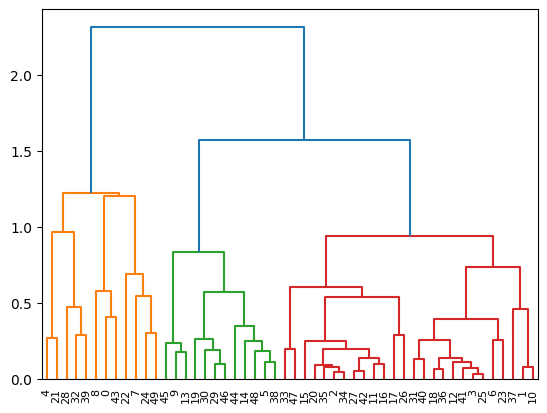

In [5]:
# Setup clustering model

clustering_method = 'ward'

dist_array = ssd.squareform(pairwise_dist)  # scipy converts to 1d array
hier = hierarchy.linkage(dist_array, method=clustering_method)
dend = hierarchy.dendrogram(
    hier, truncate_mode='level', p=30, color_threshold=1.5, distance_sort=True)

dend

#### Reference
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.fcluster.html#scipy.cluster.hierarchy.fcluster

In [6]:
# Print labels

# choose threshold using dendrogram or any other method (e.g. quantile or desired number of features)
criterion_threshold = 1.

cluster_labels = hierarchy.fcluster(hier, criterion_threshold, criterion='distance')
num_clusters = cluster_labels.max()
cluster_labels

array([2, 5, 5, 5, 1, 4, 5, 3, 2, 4, 5, 5, 5, 4, 4, 5, 5, 5, 5, 4, 5, 1,
       3, 5, 3, 5, 5, 5, 1, 4, 4, 5, 1, 5, 5, 5, 5, 5, 4, 1, 5, 5, 5, 2,
       4, 4, 4, 5, 4, 3], dtype=int32)

In [7]:
cluster_results = pd.DataFrame({
    'clusters': cluster_labels,
    'stocks': stock_symbols
}).sort_values(by=['clusters'], axis=0)

cluster_results

,clusters,stocks
4,1,stock4
21,1,stock21
28,1,stock28
32,1,stock32
39,1,stock39
43,2,stock43
8,2,stock8
0,2,stock0
49,3,stock49
24,3,stock24


In [8]:
def get_cluster_data(df, cluster_i):
    indexes = cluster_results['clusters'] == cluster_i
    stocks = cluster_results.loc[indexes]['stocks']
    return df[stocks]

# Test function by printing cluster data
get_cluster_data(df, 1)

,stock4,stock21,stock28,stock32,stock39
0,52.10,22.94,50.67,57.81,49.44
1,52.06,23.04,50.79,57.85,49.51
2,51.80,23.04,50.81,57.89,49.49
3,51.66,23.14,50.98,58.38,49.51
4,51.97,23.05,51.02,58.68,49.55
...,...,...,...,...,...
495,52.42,22.82,50.77,50.30,48.67
496,52.57,22.83,50.68,50.73,48.63
497,52.38,22.86,50.64,50.54,48.64
498,52.29,22.96,50.65,50.51,48.65


/tmp/ipykernel_31857/830606957.py:17: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


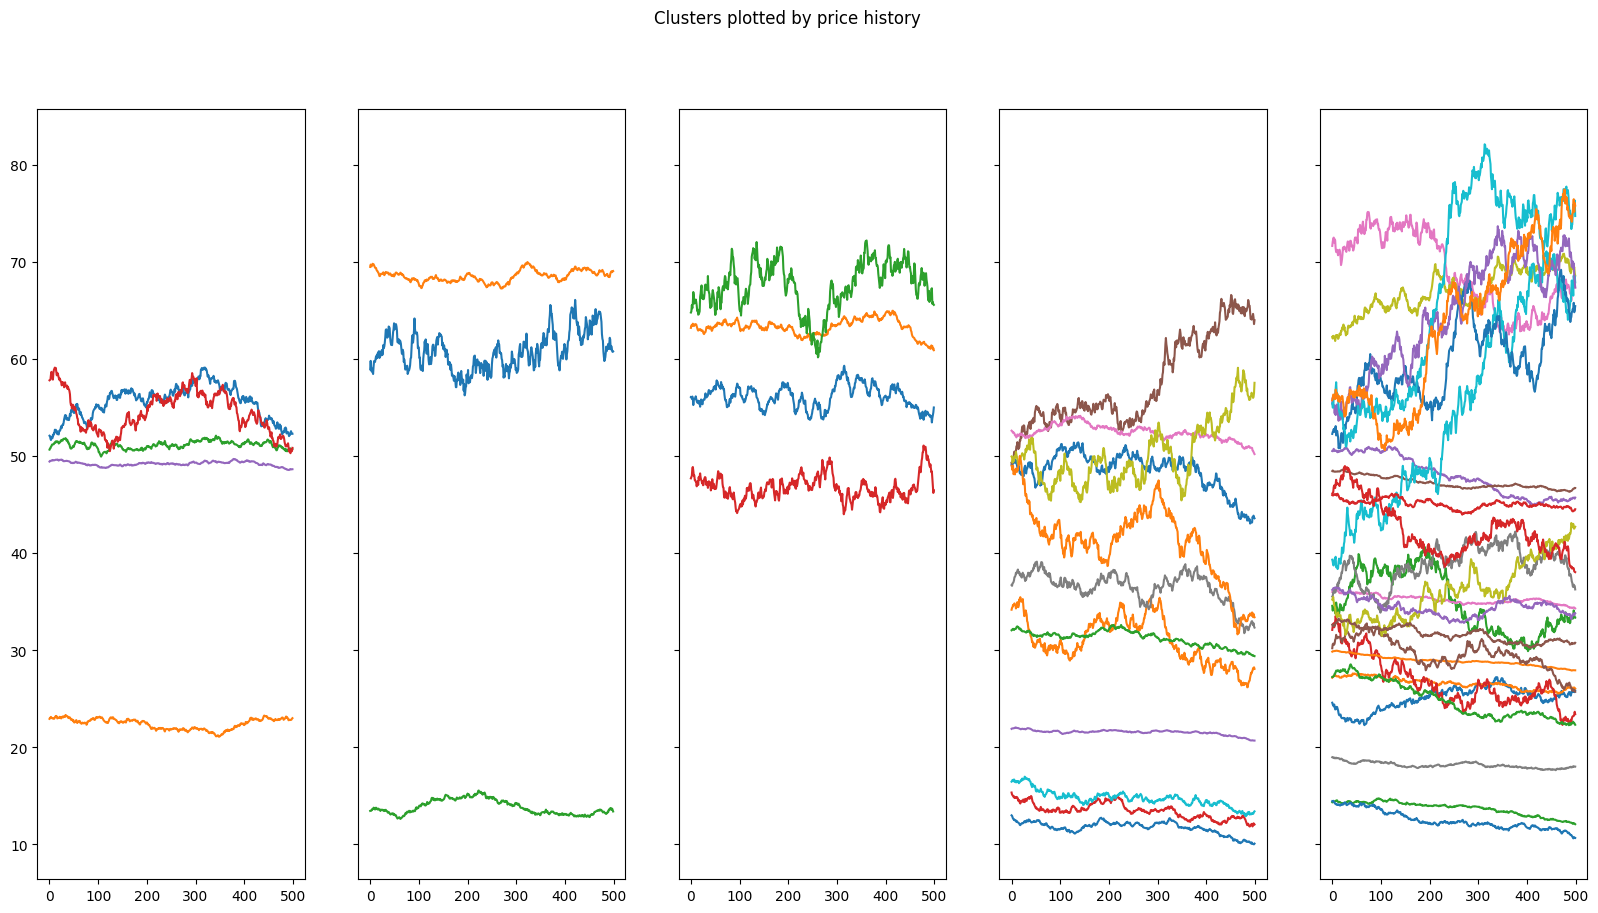

In [9]:
from math import ceil

# Plot params - max 5 graphs per row
num_cols = 5
num_rows = 1 if num_clusters <= 5 else ceil(num_clusters / 5)
fig_size = (20, 10)

fig, axs = plt.subplots(num_rows, num_cols, sharex=True, sharey=True, figsize=fig_size)
for i in range(num_clusters):
    if num_rows == 1:
        axs[i].plot(get_cluster_data(df, i + 1))
    else:
        row, col = int(i / num_cols), int(i % num_cols)
        axs[row, col].plot(get_cluster_data(df, i + 1))

fig.suptitle(f"Clusters plotted by price history")
fig.show()